<a href="https://colab.research.google.com/github/gabriellcortes/ieeecisunb/blob/main/1_periodo_boas_pr%C3%A1ticas_para_um_gr%C3%A1fico_visualiza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [26]:
dados = pd.read_csv('/content/drive/MyDrive/Colab - arquivos/2004-2019.tsv',sep='\t')
dados.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


O tipo de gráfico varia de acordo com o que você está tentando responder ao público ou do tipo de informação específica a ser comunicada. Antes de inserir um gráfico em sua apresentação, é preciso questionar se o tipo escolhido é a melhor forma de transmitir a mensagem a ser compartilhada.
Os gráficos mais comuns são:
 - Linha: exibir tendência em um determinado período; 
 - Barra: utilizada na comparação de dados entre diferentes categorias; 
 - Gráfico de dispersão: evidencia a relação entre diferentes variáveis; 
 - Histograma: explica a distribuição dos seus dados; 
 - Boxplot: visualização da dispersão dos dados


Para apresentar as boas práticas de visualização de gráficos, escolhi responder graficamente a seguinte pergunta: 
"Qual é o preço médio dos combustíveis ao longo dos anos?"


Após identificado qual questão você quer resolver, deve-se dar uma olhada nas variáveis que compoem a pergunta. Nesse caso, se trata das variáveis "Ano", "Preço médio de revenda" e "Produto". Como o eixo x (ano) se classifica como temporal e o eixo y (Preço) numerico, podemos utilizar um gráfico de linha.

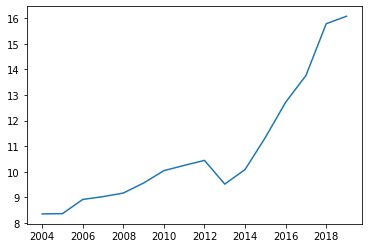

In [28]:
df = dados.groupby('ANO').mean()['PREÇO MÉDIO REVENDA'].reset_index()
x = df['ANO']
y = df['PREÇO MÉDIO REVENDA']
plt.plot(x,y)

O Gráfico acima é bastante problemático em relação a boas práticas de visualização, pois não é possível identificar qual informação se trata, portanto, a primeira modificação a ser feita é colocar os títulos dos eixos

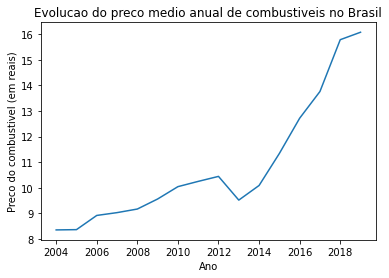

In [29]:
plt.plot(df['ANO'],df['PREÇO MÉDIO REVENDA'])
plt.xlabel('Ano') # Definindo o nome do eixo x
plt.ylabel('Preco do combustivel (em reais)') # Definindo o nome do eixo y
plt.title('Evolucao do preco medio anual de combustiveis no Brasil') # Definindo o titulo
plt.show()

Com os títulos já é possível identificar qual informação o gráfico está se referindo.

Após isso, vamos melhorar a visualização do gráfico, nessa etapa iremos redimensionar o gráfico para a proporção 9:5 e adicionar grid.

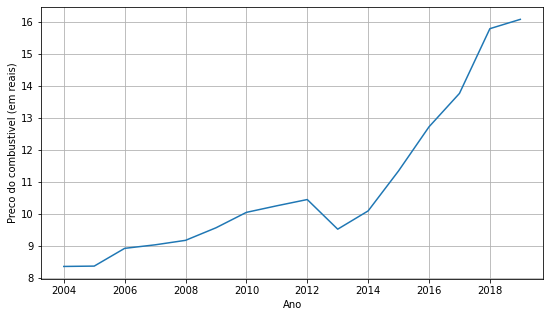

In [30]:
plt.figure(figsize=(9,5))
plt.plot(df['ANO'],df['PREÇO MÉDIO REVENDA'])
plt.xlabel('Ano') # Definindo o nome do eixo x
plt.ylabel('Preco do combustivel (em reais)') # Definindo o nome do eixo y
plt.grid(True) 
plt.show()

Dessa forma o gráfico está com um visual bem limpo e claro, porém, ainda podemos melhorar a transmissão da informação adicionando mais uma dimensão ao gráfico. Portanto, vamos adicionar uma linha para cada tipo de combustível do banco de dados.

In [31]:
b = dados['PRODUTO'].unique() # Coletando as categorias da nossa variavel
k = []
for produto in b:
    k.append((dados[dados['PRODUTO'] == produto]).groupby('ANO').mean()['PREÇO MÉDIO REVENDA'])
# Criando uma lista com series, onde o index é o ano e o valor é o valor médio do preço de revenda

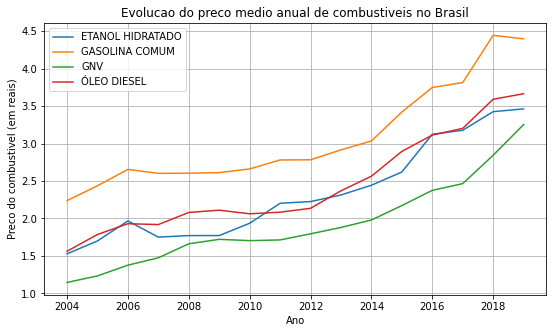

In [34]:
x = k[0].index # Coletando os index 
plt.figure(figsize=(9,5))
plt.grid(True) 
plt.xlabel('Ano') # Definindo o nome do eixo x
plt.ylabel('Preco do combustivel (em reais)') # Definindo o nome do eixo y
plt.title('Evolucao do preco medio anual de combustiveis no Brasil') # Definindo o titulo
plt.plot(x,k[0].values,x,k[1].values,x,k[3].values,x,k[4].values) # Definindo os eixos. obs: Retirei as categorias que não tem observações em todos os anos
plt.legend([b[0],b[1],b[3],b[4]]) # Definindo o nome das linhas na legenda (Legenda)
plt.show() # Mostrando o gráfico 

Com as devidas melhorias, é possível trazer a informação somente com um gráfico, sem necessitar de mais dados. 